In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, adjusted_rand_score, accuracy_score, ConfusionMatrixDisplay, roc_curve, auc
from scipy.optimize import linear_sum_assignment
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

In [39]:
X = pd.read_csv("/home/joaomonteiro/Desktop/BIOINF/trabalho2/data/X_gexp.csv", index_col=0)
y = pd.read_csv("/home/joaomonteiro/Desktop/BIOINF/trabalho2/data/y_gexp.csv", index_col=0)
y_flat = y.values.ravel()  # Flatten to 1D

In [41]:
X.head()

,FSTL1,ELMO2,CREB3L1,PNMA1,MMP2,SMARCD3,PKNOX2,RALYL,ZHX3,APBB2,...,ST18,PSMB9,ProSAPiP1,HCLS1,MMP9,KIAA0802,DHRS2,SGEF,PIK3IP1,CTSC
TCGA-02-0001-01,2.275179,1.873549,1.772059,2.144198,2.269443,1.742389,1.797055,1.677848,1.801352,1.786488,...,1.669895,2.346811,2.004333,2.213310,2.407606,2.083333,2.098461,1.680092,1.953595,2.429578
TCGA-02-0004-01,2.569520,2.085888,1.961846,2.315705,2.505400,2.226593,1.798769,1.671170,2.000942,2.089285,...,1.516024,2.339930,2.045828,2.285701,2.633632,1.938474,1.614437,1.760419,2.010156,2.431814
TCGA-02-0009-01,2.471492,2.030865,1.845808,2.072279,2.346815,1.783762,1.707150,1.599492,1.823480,1.778307,...,1.527561,2.302006,2.059862,2.130193,2.349831,1.815239,1.857933,1.675823,2.011970,2.434026
TCGA-02-0015-01,2.464403,2.094165,1.762169,2.374129,2.213562,2.209426,1.925440,1.936043,2.003743,2.024847,...,1.611626,2.208924,2.050555,2.213955,1.982603,2.125508,1.631955,1.881003,1.886280,2.450704
TCGA-02-0016-01,2.365457,2.188070,1.763206,2.340024,2.219210,2.308335,1.801007,1.756726,2.115714,2.086733,...,1.570489,2.187420,2.265522,2.192262,1.796491,1.979615,1.637215,2.182186,1.897957,2.140727


In [8]:
y.head()

,x
TCGA-02-0001-01,0
TCGA-02-0004-01,1
TCGA-02-0009-01,0
TCGA-02-0015-01,0
TCGA-02-0016-01,0


In [9]:
X.isna().sum()

FSTL1       0
ELMO2       0
CREB3L1     0
PNMA1       0
MMP2        0
           ..
KIAA0802    0
DHRS2       0
SGEF        0
PIK3IP1     0
CTSC        0
Length: 5000, dtype: int64

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [12]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

/home/joaomonteiro/Desktop/BIOINF/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/joaomonteiro/Desktop/BIOINF/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [13]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [14]:
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

In [15]:
results = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'UMAP1': X_umap[:, 0],
    'UMAP2': X_umap[:, 1],
    'KMeans': kmeans_labels,
    'Hierarchical': hierarchical_labels,
    'TrueLabel': y.values.ravel()
})


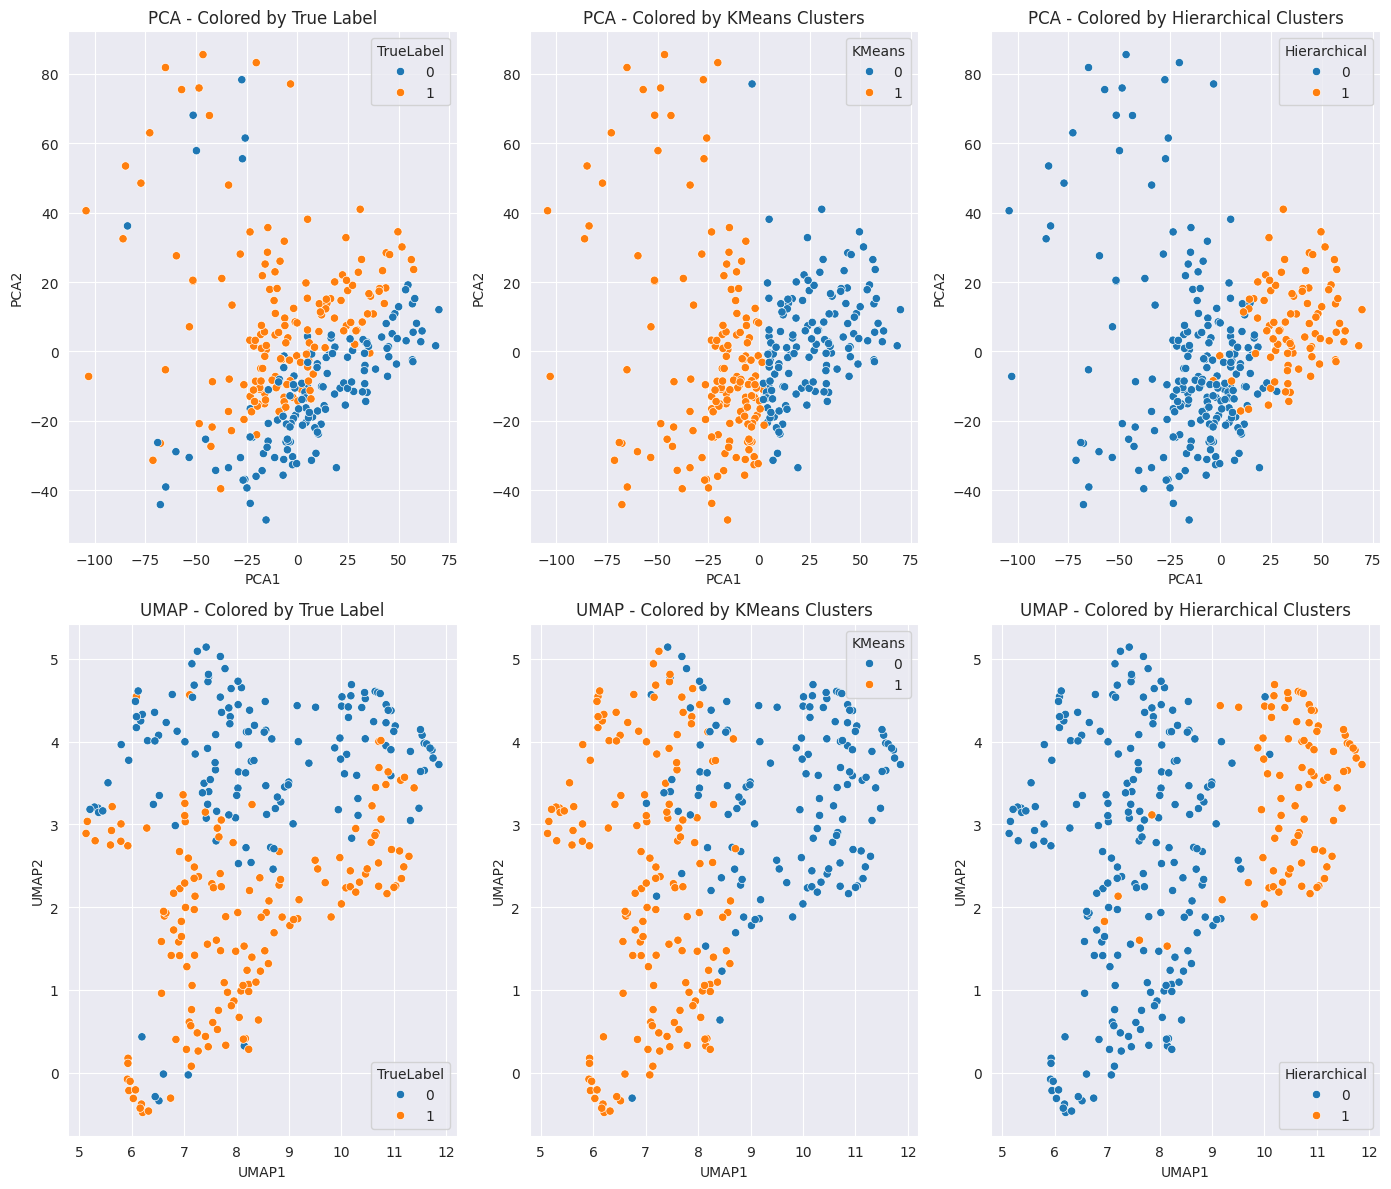

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(14, 12))

sns.scatterplot(data=results, x='PCA1', y='PCA2', hue='TrueLabel', ax=axes[0, 0])
axes[0, 0].set_title('PCA - Colored by True Label')

sns.scatterplot(data=results, x='PCA1', y='PCA2', hue='KMeans', ax=axes[0, 1])
axes[0, 1].set_title('PCA - Colored by KMeans Clusters')

sns.scatterplot(data=results, x='PCA1', y='PCA2', hue='Hierarchical', ax=axes[0, 2])
axes[0, 2].set_title('PCA - Colored by Hierarchical Clusters')


sns.scatterplot(data=results, x='UMAP1', y='UMAP2', hue='TrueLabel', ax=axes[1, 0])
axes[1, 0].set_title('UMAP - Colored by True Label')

sns.scatterplot(data=results, x='UMAP1', y='UMAP2', hue='KMeans', ax=axes[1, 1])
axes[1, 1].set_title('UMAP - Colored by KMeans Clusters')

sns.scatterplot(data=results, x='UMAP1', y='UMAP2', hue='Hierarchical', ax=axes[1, 2])
axes[1, 2].set_title('UMAP - Colored by Hierarchical Clusters')


plt.tight_layout()
plt.show()

In [17]:
def best_label_mapping(true_labels, cluster_labels):
    contingency = confusion_matrix(true_labels, cluster_labels)
    row_ind, col_ind = linear_sum_assignment(-contingency)
    mapping = {col: row for row, col in zip(row_ind, col_ind)}
    return np.array([mapping[label] for label in cluster_labels])


In [18]:
kmeans_aligned = best_label_mapping(y_flat, kmeans_labels)

# Evaluation metrics
conf_matrix = confusion_matrix(y_flat, kmeans_aligned)
accuracy = accuracy_score(y_flat, kmeans_aligned)
ari = adjusted_rand_score(y_flat, kmeans_labels)

print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.3f}")
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

Confusion Matrix:
 [[85 60]
 [58 99]]
Accuracy: 0.609
Adjusted Rand Index (ARI): 0.045


In [19]:
hierarchical_aligned = best_label_mapping(y_flat, hierarchical_labels)

# Evaluation metrics
conf_matrix = confusion_matrix(y_flat, hierarchical_aligned)
accuracy = accuracy_score(y_flat, hierarchical_aligned)
ari = adjusted_rand_score(y_flat, hierarchical_labels)

print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.3f}")
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

Confusion Matrix:
 [[ 47  98]
 [ 42 115]]
Accuracy: 0.536
Adjusted Rand Index (ARI): 0.002


## Classification


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings

In [21]:
warnings.filterwarnings("ignore")

In [22]:
kf = StratifiedKFold(n_splits=5, shuffle=True)

In [23]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=100)
}

In [24]:
results = {name: {"accuracy": [], "precision": [], "recall": [], "f1": []} for name in models}

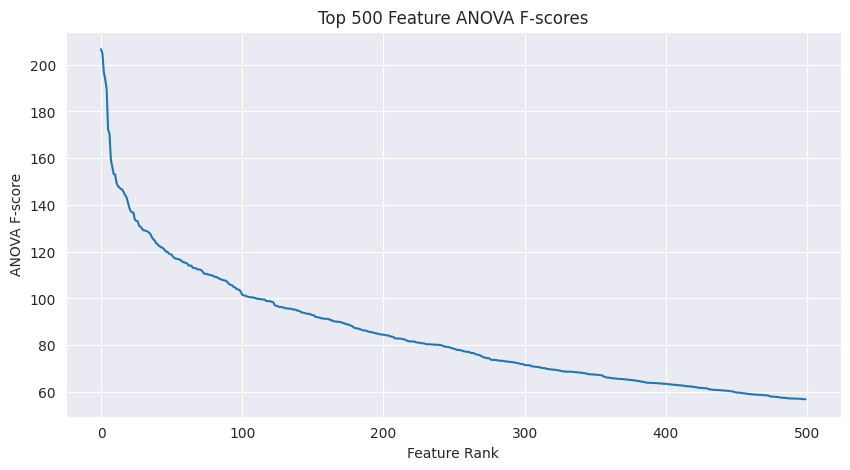

In [25]:

f_scores, _ = f_classif(X_scaled, y.values.ravel())


top_k = 500
sorted_scores = np.sort(f_scores)[::-1][:top_k]


plt.figure(figsize=(10, 5))
plt.plot(range(top_k), sorted_scores)
plt.xlabel("Feature Rank")
plt.ylabel("ANOVA F-score")
plt.title("Top 500 Feature ANOVA F-scores")
plt.grid(True)
plt.show()

In [49]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=100)
}

feature_reductions = {
    "PCA": PCA(n_components=200),
    "Anova": SelectKBest(score_func=f_classif, k=200),
    "UMAP": umap.UMAP(n_components=200),
}


#################################
# Evaluating LogisticRegression #
#################################

#################################
#           With PCA            #
#################################

Accuracy: 0.911
Precision: 0.912
Recall: 0.918
F1: 0.914



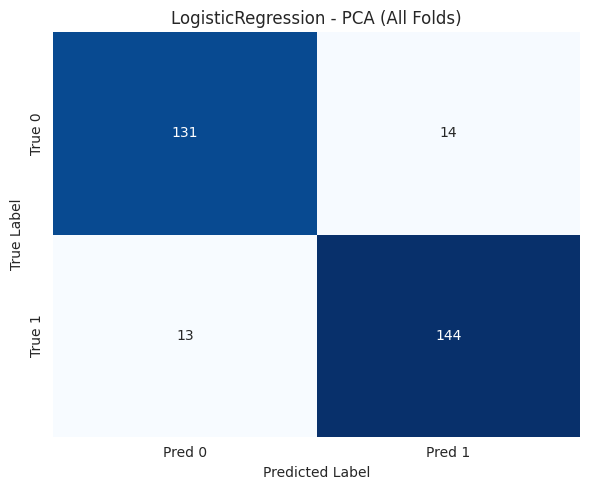

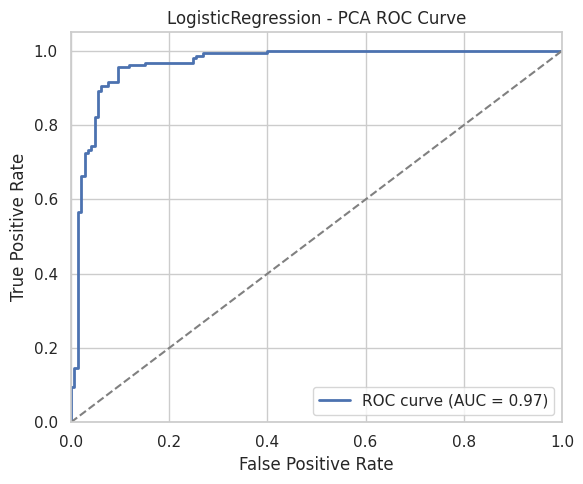


#################################
#          With Anova           #
#################################

Accuracy: 0.911
Precision: 0.923
Recall: 0.904
F1: 0.913



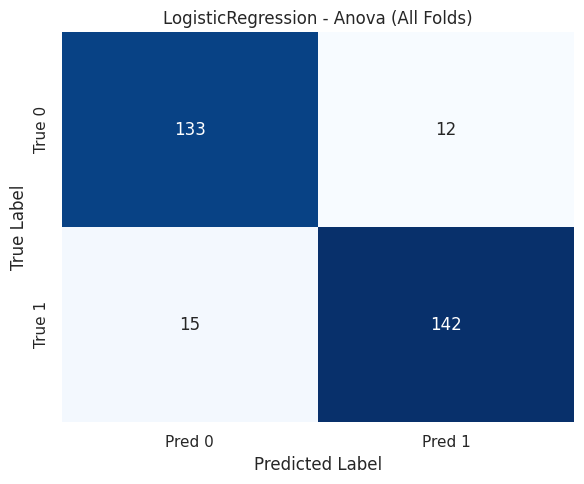

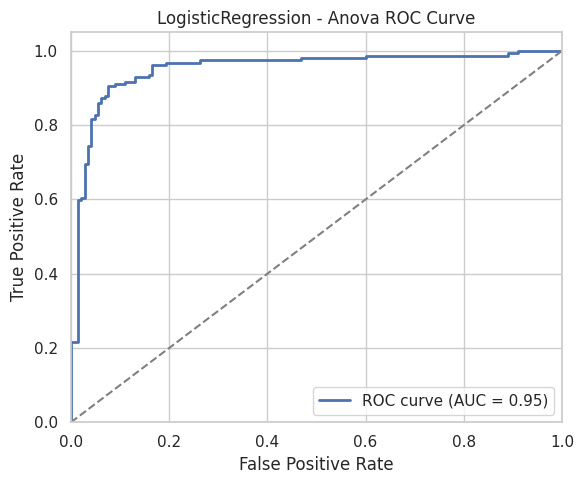


#################################
#           With UMAP           #
#################################

Accuracy: 0.867
Precision: 0.917
Recall: 0.814
F1: 0.860



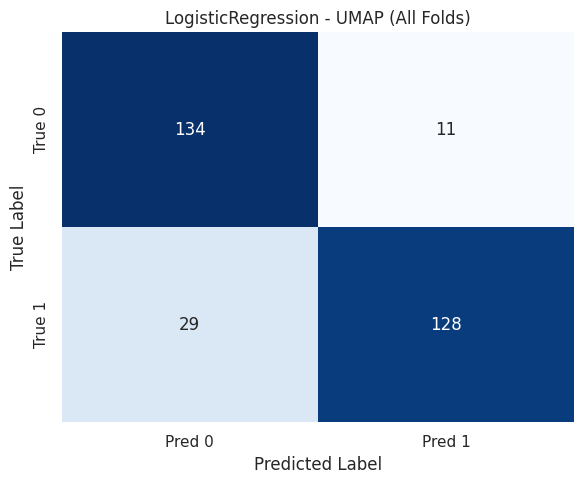

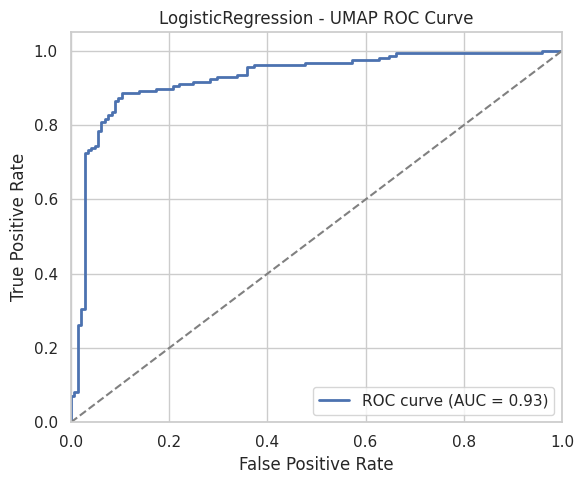


#################################
#    Evaluating RandomForest    #
#################################

#################################
#           With PCA            #
#################################

Accuracy: 0.891
Precision: 0.886
Recall: 0.911
F1: 0.897



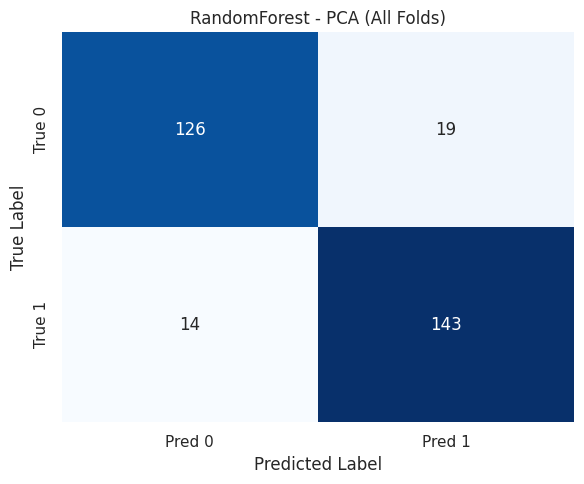

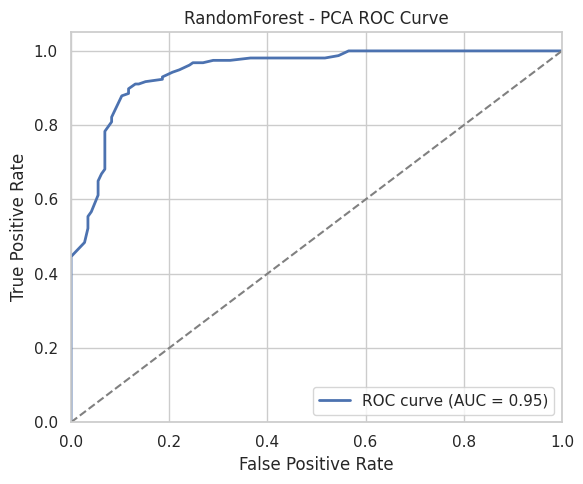


#################################
#          With Anova           #
#################################

Accuracy: 0.914
Precision: 0.903
Recall: 0.936
F1: 0.917



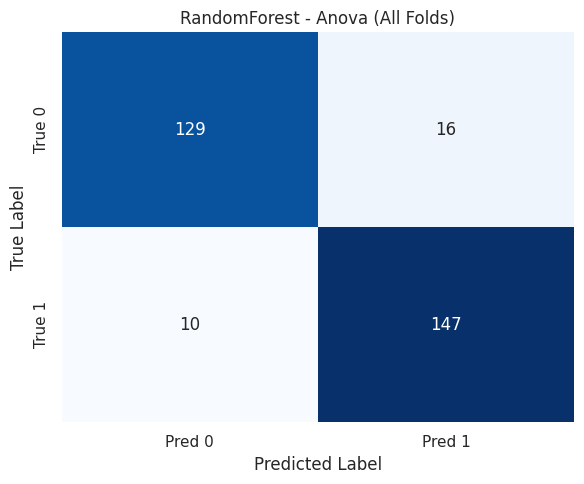

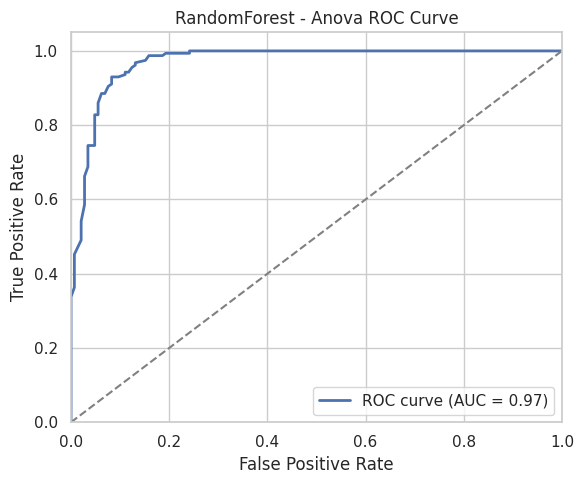


#################################
#           With UMAP           #
#################################

Accuracy: 0.868
Precision: 0.925
Recall: 0.815
F1: 0.865



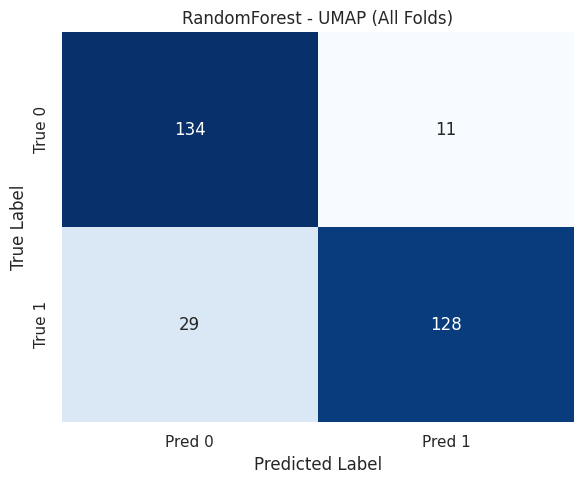

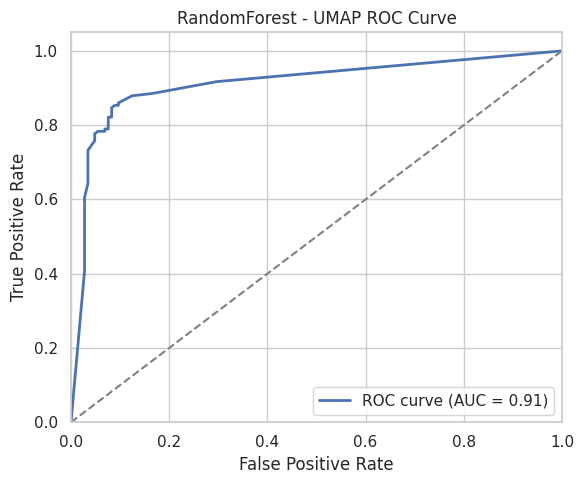

In [57]:
all_results = {}

for name, model in models.items():
    model_results = {}
    print("#################################")
    spaces_left = len("#################################")-len(f"Evaluating {name}")-2
    print("#"+ " "*(int(np.floor(spaces_left/2)))+ f"Evaluating {name}"+ " "*(int(np.ceil(spaces_left/2)))+ "#")
    print("#################################\n")

    for method_name, selector in feature_reductions.items():
        print("#################################")
        spaces_left = len("#################################")-len(f"With {method_name}")-2
        print("#"+ " "*(int(np.floor(spaces_left/2)))+ f"With {method_name}"+ " "*(int(np.ceil(spaces_left/2)))+ "#")
        print("#################################\n")

        metrics = {"accuracy": [], "precision": [], "recall": [], "f1": []}

        all_y_true = []
        all_y_pred = []
        all_y_prob = []

        for train_idx, test_idx in kf.split(X, y_flat):

            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y_flat[train_idx], y_flat[test_idx]

            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('feature_selection', selector),
                ('classifier', model)
            ])
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            y_proba = pipeline.predict_proba(X_test)[:, 1]

            metrics["accuracy"].append(accuracy_score(y_test, y_pred))
            metrics["precision"].append(precision_score(y_test, y_pred))
            metrics["recall"].append(recall_score(y_test, y_pred))
            metrics["f1"].append(f1_score(y_test, y_pred))

            all_y_true.extend(y_test)
            all_y_pred.extend(y_pred)
            all_y_prob.extend(y_proba)

        model_results[method_name] = {"accuracy": np.mean(metrics["accuracy"]),
                                      "precision": np.mean(metrics["precision"]),
                                      "recall": np.mean(metrics["recall"]),
                                      "f1": np.mean(metrics["f1"])}

        print(f"Accuracy: {model_results[method_name]['accuracy']:.3f}")
        print(f"Precision: {model_results[method_name]['precision']:.3f}")
        print(f"Recall: {model_results[method_name]['recall']:.3f}")
        print(f"F1: {model_results[method_name]['f1']:.3f}\n")

        cm = confusion_matrix(all_y_true, all_y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title(f"{name} - {method_name} (All Folds)")
        plt.tight_layout()
        plt.show()


        fpr, tpr, _ = roc_curve(all_y_true, all_y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 5))
        sns.set(style='whitegrid')
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', linewidth=2)
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"{name} - {method_name} ROC Curve")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

        print()

    all_results[name] = model_results



In [55]:
all_y_true

[np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.in

In [56]:
all_y_prob

[]

In [54]:
fpr, tpr, _ = roc_curve(all_y_true, all_y_prob)

ValueError: Found input variables with inconsistent numbers of samples: [302, 0]

In [29]:

all_results = []
for method_name, selector in feature_reductions.items():

    for train_idx, test_idx in kf.split(X, y_flat):
        metrics = {"accuracy": [], "precision": [], "recall": [], "f1": []}

        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y_flat[train_idx], y_flat[test_idx]

        for name, model in models.items():

            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('feature_selection', selector),
                ('classifier', model)
            ])
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)

            metrics["accuracy"].append(accuracy_score(y_test, y_pred))
            metrics["precision"].append(precision_score(y_test, y_pred))
            metrics["recall"].append(recall_score(y_test, y_pred))
            metrics["f1"].append(f1_score(y_test, y_pred))

    summary = {
        "Model": name,
        "Method": method_name,
        "Accuracy (mean)": np.mean(metrics["accuracy"]),
        "Accuracy (std)": np.std(metrics["accuracy"]),
        "Precision (mean)": np.mean(metrics["precision"]),
        "Recall (mean)": np.mean(metrics["recall"]),
        "F1 (mean)": np.mean(metrics["f1"])
    }
    all_results.append(summary)

    #
    # summary = {
    #     "Method": method_name,
    #     "Accuracy (mean)": np.mean(metrics["accuracy"]),
    #     "Accuracy (std)": np.std(metrics["accuracy"]),
    #     "Precision (mean)": np.mean(metrics["precision"]),
    #     "Recall (mean)": np.mean(metrics["recall"]),
    #     "F1 (mean)": np.mean(metrics["f1"])
    # }
    # all_results.append(summary)


results_df = pd.DataFrame(all_results)
print(results_df)
            # Collect metrics
            # results[name]["accuracy"].append(accuracy_score(y_test, y_pred))
            # results[name]["precision"].append(precision_score(y_test, y_pred))
            # results[name]["recall"].append(recall_score(y_test, y_pred))
            # results[name]["f1"].append(f1_score(y_test, y_pred))

KeyboardInterrupt: 

In [25]:
summary = []
for model, metrics in results.items():
    row = {'Model': model}
    for metric, scores in metrics.items():
        row[f"{metric}_mean"] = np.mean(scores)
        row[f"{metric}_std"] = np.std(scores)
    summary.append(row)

In [26]:
summary_df = pd.DataFrame(summary)
print(summary_df)

                Model  accuracy_mean  accuracy_std  precision_mean  \
0  LogisticRegression            NaN           NaN             NaN   
1        RandomForest            NaN           NaN             NaN   

   precision_std  recall_mean  recall_std  f1_mean  f1_std  
0            NaN          NaN         NaN      NaN     NaN  
1            NaN          NaN         NaN      NaN     NaN  


In [27]:
summary_df = pd.DataFrame(summary)
print(summary_df)

                Model  accuracy_mean  accuracy_std  precision_mean  \
0  LogisticRegression            NaN           NaN             NaN   
1        RandomForest            NaN           NaN             NaN   

   precision_std  recall_mean  recall_std  f1_mean  f1_std  
0            NaN          NaN         NaN      NaN     NaN  
1            NaN          NaN         NaN      NaN     NaN  


In [28]:
summary_df = pd.DataFrame(summary)
print(summary_df)

                Model  accuracy_mean  accuracy_std  precision_mean  \
0  LogisticRegression            NaN           NaN             NaN   
1        RandomForest            NaN           NaN             NaN   

   precision_std  recall_mean  recall_std  f1_mean  f1_std  
0            NaN          NaN         NaN      NaN     NaN  
1            NaN          NaN         NaN      NaN     NaN  
